In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [61]:
df =pd.read_csv('data\Air Pollution.csv')
df

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
0,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,2022
1,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,2022
2,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,2022
3,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,2022
4,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,2022
...,...,...,...,...,...,...,...,...,...,...
32186,Viet Nam,Nha Trang,2013,NaN,30.00,NaN,NaN,NaN,NaN,2018
32187,Viet Nam,Nha Trang,2014,NaN,12.00,NaN,NaN,NaN,NaN,2018
32188,Viet Nam,Nha Trang,2015,NaN,14.00,NaN,NaN,NaN,NaN,2018
32189,Viet Nam,Viet Tri,2013,NaN,27.00,NaN,NaN,NaN,NaN,2018


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                32191 non-null  object 
 1   City                        32191 non-null  object 
 2   Year                        32191 non-null  int64  
 3   PM2.5 (μg/m3)               15048 non-null  float64
 4   PM10 (μg/m3)                21109 non-null  float64
 5   NO2 (μg/m3)                 22200 non-null  float64
 6   PM25 temporal coverage (%)  7275 non-null   float64
 7   PM10 temporal coverage (%)  5381 non-null   float64
 8   NO2 temporal coverage (%)   19890 non-null  float64
 9   Updated Year                32191 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 2.5+ MB


In [63]:
df.isnull().sum()

Country Name                      0
City                              0
Year                              0
PM2.5 (μg/m3)                 17143
PM10 (μg/m3)                  11082
NO2 (μg/m3)                    9991
PM25 temporal coverage (%)    24916
PM10 temporal coverage (%)    26810
NO2 temporal coverage (%)     12301
Updated Year                      0
dtype: int64

In [64]:
df[df.duplicated()]

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
202,Australia,Perth,2019,6.84,12.58,9.09,96.200000,95.966667,97.350000,2022
1251,Bangladesh,Chittagong,2017,56.92,120.25,27.58,40.165525,50.582192,41.666667,2022
16717,Iraq,Baghdad,2019,42.51,NaN,50.23,76.000000,NaN,NaN,2022
20644,Mexico,Mexico City,2018,22.70,42.50,83.94,89.189311,90.202111,90.558051,2022
20736,Mexico,Villahermosa,2018,13.00,24.75,NaN,NaN,90.705143,NaN,2022
...,...,...,...,...,...,...,...,...,...,...
28643,Switzerland,Saxon,2019,8.00,11.99,14.51,NaN,NaN,99.794521,2022
28796,Switzerland,Winterthur,2013,NaN,19.01,24.60,NaN,NaN,97.716895,2022
28801,Switzerland,Winterthur,2017,NaN,13.72,17.92,NaN,NaN,97.682648,2022
28803,Switzerland,Winterthur,2018,NaN,15.09,16.11,NaN,NaN,99.611872,2022


In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.isnull().sum()

Country Name                      0
City                              0
Year                              0
PM2.5 (μg/m3)                 17083
PM10 (μg/m3)                  11076
NO2 (μg/m3)                    9990
PM25 temporal coverage (%)    24828
PM10 temporal coverage (%)    26732
NO2 temporal coverage (%)     12299
Updated Year                      0
dtype: int64

In [67]:
df.columns

Index(['Country Name', 'City', 'Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)',
       'NO2 (μg/m3)', 'PM25 temporal coverage (%)',
       'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)',
       'Updated Year'],
      dtype='object')

In [68]:

#Look at the mean of each column by City
df.groupby('City')[['PM2.5 (μg/m3)','PM10 (μg/m3)','NO2 (μg/m3)','PM25 temporal coverage (%)',
                    'PM10 temporal coverage (%)','NO2 temporal coverage (%)']].mean()

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)
City,,,,,,
A Coruna,14.125,25.647143,21.651429,NaN,NaN,96.980474
Aachen,NaN,20.781429,36.453750,NaN,94.744473,95.974586
Aadorf,NaN,13.068571,12.450000,NaN,100.000000,99.460310
Aalborg,11.504,NaN,15.030000,89.58900,NaN,94.084765
Aalen,NaN,16.998750,21.748571,NaN,99.526500,97.466607
...,...,...,...,...,...,...
Šiauliai,NaN,21.650000,21.006667,NaN,94.622446,95.614567
Šumperk,14.990,18.870000,17.530000,98.59589,98.595890,98.595890
Ţeţchea,NaN,NaN,16.395000,NaN,NaN,89.463470


In [69]:
df.loc[21879:21882]

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
21879,Philippines,Urdaneta,2015,NaN,NaN,NaN,NaN,NaN,NaN,2022
21880,Philippines,Urdaneta,2016,NaN,NaN,NaN,NaN,NaN,NaN,2022
21881,Philippines,Urdaneta,2017,NaN,NaN,NaN,NaN,NaN,NaN,2022
21882,Philippines,Urdaneta,2018,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [70]:
df.loc[3423:3425]

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
3423,Canada,Taylor,2017,NaN,NaN,NaN,NaN,NaN,NaN,2022
3424,Canada,Taylor,2018,NaN,NaN,13.0,NaN,NaN,95.0,2022
3425,Canada,Taylor,2019,NaN,NaN,13.0,NaN,NaN,94.0,2022


In [71]:
#Phillippines?
df.loc[21795:21800]

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
21795,Philippines,Baguio City,2015,NaN,NaN,NaN,NaN,NaN,NaN,2022
21796,Philippines,Baguio City,2017,NaN,79.0,NaN,NaN,NaN,NaN,2022
21797,Philippines,Baguio City,2018,NaN,66.0,NaN,NaN,NaN,NaN,2022
21798,Philippines,Caloocan City,2012,NaN,NaN,NaN,NaN,NaN,NaN,2022
21799,Philippines,Caloocan City,2013,NaN,NaN,NaN,NaN,NaN,NaN,2022
21800,Philippines,Caloocan City,2015,32.0,NaN,NaN,NaN,NaN,NaN,2022


In [72]:
df[df['Country Name']=='Argentina']

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
21,Argentina,Buenos Aires,2014,10.11,NaN,NaN,91.00,NaN,NaN,2022
22,Argentina,Buenos Aires,2015,10.26,27.87,NaN,1.04,NaN,NaN,2022
23,Argentina,Buenos Aires,2016,NaN,26.88,15.35,NaN,91.666667,91.666667,2018
24,Argentina,Buenos Aires,2017,NaN,25.40,19.57,NaN,100.000000,100.000000,2022
25,Argentina,Buenos Aires,2018,NaN,24.40,16.60,NaN,100.000000,87.500000,2022
26,Argentina,Buenos Aires,2019,NaN,25.50,18.25,NaN,97.200000,87.500000,2022


In [73]:
df.loc[21795:21882]

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
21795,Philippines,Baguio City,2015,NaN,NaN,NaN,NaN,NaN,NaN,2022
21796,Philippines,Baguio City,2017,NaN,79.0,NaN,NaN,NaN,NaN,2022
21797,Philippines,Baguio City,2018,NaN,66.0,NaN,NaN,NaN,NaN,2022
21798,Philippines,Caloocan City,2012,NaN,NaN,NaN,NaN,NaN,NaN,2022
21799,Philippines,Caloocan City,2013,NaN,NaN,NaN,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...
21878,Philippines,Urdaneta,2013,NaN,40.0,NaN,NaN,NaN,NaN,2022
21879,Philippines,Urdaneta,2015,NaN,NaN,NaN,NaN,NaN,NaN,2022
21880,Philippines,Urdaneta,2016,NaN,NaN,NaN,NaN,NaN,NaN,2022
21881,Philippines,Urdaneta,2017,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [74]:
index_names = df[ df['Country Name'] == 'Philippines' ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

In [75]:
index_canada = df[ df['City'] == 'Taylor' ].index
df.drop(index_canada, inplace = True)

In [76]:

#Look at the mean of each column by City
df.groupby('City')[['PM2.5 (μg/m3)','PM10 (μg/m3)','NO2 (μg/m3)','PM25 temporal coverage (%)',
                    'PM10 temporal coverage (%)','NO2 temporal coverage (%)']].mean()

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)
City,,,,,,
A Coruna,14.125,25.647143,21.651429,NaN,NaN,96.980474
Aachen,NaN,20.781429,36.453750,NaN,94.744473,95.974586
Aadorf,NaN,13.068571,12.450000,NaN,100.000000,99.460310
Aalborg,11.504,NaN,15.030000,89.58900,NaN,94.084765
Aalen,NaN,16.998750,21.748571,NaN,99.526500,97.466607
...,...,...,...,...,...,...
Šiauliai,NaN,21.650000,21.006667,NaN,94.622446,95.614567
Šumperk,14.990,18.870000,17.530000,98.59589,98.595890,98.595890
Ţeţchea,NaN,NaN,16.395000,NaN,NaN,89.463470


In [77]:
df.groupby(['Country Name','Year'])[['PM2.5 (μg/m3)','PM10 (μg/m3)','NO2 (μg/m3)','PM25 temporal coverage (%)',
                    'PM10 temporal coverage (%)','NO2 temporal coverage (%)']].mean()

PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
Country Name Year                                             
Afghanistan  2019        119.770           NaN          NaN   
Albania      2014            NaN       15.2500          NaN   
             2015         21.790       25.4675    18.585000   
             2016         21.480       29.1600    21.186667   
             2017            NaN           NaN    24.700000   
...                          ...           ...          ...   
Viet Nam     2015         81.760       28.9800          NaN   
             2016         46.920           NaN          NaN   
             2017         40.955           NaN          NaN   
             2018         33.380           NaN          NaN   
             2019         39.355           NaN          NaN   

                   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
Country Name Year                                                           
Afghanistan  2019                   18.000000                         NaN   
Albania      2014                         NaN                         NaN   
             2015                         NaN                         NaN   
             2016                         NaN                         NaN   
             2017                         NaN                         NaN   
...                                       ...                         ...   
Viet Nam     2015                    5.525114                         NaN   
             2016                   87.424895                         NaN   
             2017                   96.334606                         NaN   
             2018                   96.722514                         NaN   
             2019                   72.000000                         NaN   

                   NO2 temporal coverage (%)  
Country Name Year                             
Afghanistan  2019                        NaN  
Albania      2014                        NaN  
             2015                  86.635274  
             2016                  91.089860  
             2017                  89.292237  
...                                      ...  
Viet Nam     2015                        NaN  
             2016                        NaN  
             2017                        NaN  
             2018                        NaN  
             2019                        NaN  

[711 rows x 6 columns]

In [78]:
#Take the PM10 mean based on Country

df['PM10 (μg/m3)'] = df.apply(lambda row: df.groupby(['Country Name'])['PM10 (μg/m3)'].mean()[row['Country Name']] if pd.isna(row['PM10 (μg/m3)']) else row['PM10 (μg/m3)'],axis=1)


In [79]:
#Take the PM2.5 based on Country

df['PM2.5 (μg/m3)'] = df.apply(lambda row: df.groupby(['Country Name'])['PM2.5 (μg/m3)'].mean()[row['Country Name']] if pd.isna(row['PM2.5 (μg/m3)']) else row['PM2.5 (μg/m3)'],axis=1)

In [80]:
#Take the NO2 based on Country

df['NO2 (μg/m3)'] = df.apply(lambda row: df.groupby(['Country Name'])['NO2 (μg/m3)'].mean()[row['Country Name']] if pd.isna(row['NO2 (μg/m3)']) else row['NO2 (μg/m3)'],axis=1)

In [81]:
#Take the PM25 temporal coverage mean based on Country
df['PM25 temporal coverage (%)'] = df.apply(lambda row: df.groupby(['Country Name'])['PM25 temporal coverage (%)'].mean()[row['Country Name']] if pd.isna(row['PM25 temporal coverage (%)']) else row['PM25 temporal coverage (%)'],axis=1)

In [82]:
#Take the PM10 temporal coverage mean based on Country
df['PM10 temporal coverage (%)'] = df.apply(lambda row: df.groupby(['Country Name'])['PM10 temporal coverage (%)'].mean()[row['Country Name']] if pd.isna(row['PM10 temporal coverage (%)']) else row['PM10 temporal coverage (%)'],axis=1)

In [83]:
#Take the NO2 temporal coverage mean based on Country

df['NO2 temporal coverage (%)'] = df.apply(lambda row: df.groupby(['Country Name'])['NO2 temporal coverage (%)'].mean()[row['Country Name']] if pd.isna(row['NO2 temporal coverage (%)']) else row['NO2 temporal coverage (%)'],axis=1)

In [84]:
df.isnull().sum()

Country Name                     0
City                             0
Year                             0
PM2.5 (μg/m3)                  118
PM10 (μg/m3)                   103
NO2 (μg/m3)                    321
PM25 temporal coverage (%)    3254
PM10 temporal coverage (%)    6257
NO2 temporal coverage (%)     6574
Updated Year                     0
dtype: int64

In [85]:
df.groupby('Year')[['PM2.5 (μg/m3)','PM10 (μg/m3)','NO2 (μg/m3)','PM25 temporal coverage (%)',
                    'PM10 temporal coverage (%)','NO2 temporal coverage (%)']].mean()

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)
Year,,,,,,
2000,53.905556,162.500000,51.625000,87.153520,83.470320,80.821918
2001,53.905556,152.733333,51.625000,87.153520,83.470320,80.821918
2002,53.905556,116.733333,51.625000,87.153520,83.470320,80.821918
2003,53.905556,186.400000,51.625000,87.153520,83.470320,80.821918
2004,53.905556,135.800000,51.625000,87.153520,83.470320,80.821918
2006,53.905556,93.620000,51.625000,87.153520,83.470320,80.821918
2007,53.905556,163.733333,51.625000,87.153520,83.470320,80.821918
2008,53.905556,266.200000,51.625000,87.153520,83.470320,80.821918
2009,53.905556,281.400000,51.625000,87.153520,83.470320,80.821918


In [86]:
#Based on Year

df['PM2.5 (μg/m3)'] = df.apply(lambda row: df.groupby(['Year'])['PM2.5 (μg/m3)'].mean()[row['Year']] if pd.isna(row['PM2.5 (μg/m3)']) else row['PM2.5 (μg/m3)'],axis=1)
df['PM10 (μg/m3)'] = df.apply(lambda row: df.groupby(['Year'])['PM10 (μg/m3)'].mean()[row['Year']] if pd.isna(row['PM10 (μg/m3)']) else row['PM10 (μg/m3)'],axis=1)
df['NO2 (μg/m3)'] = df.apply(lambda row: df.groupby(['Year'])['NO2 (μg/m3)'].mean()[row['Year']] if pd.isna(row['NO2 (μg/m3)']) else row['NO2 (μg/m3)'],axis=1)
df['PM25 temporal coverage (%)'] = df.apply(lambda row: df.groupby(['Year'])['PM25 temporal coverage (%)'].mean()[row['Year']] if pd.isna(row['PM25 temporal coverage (%)']) else row['PM25 temporal coverage (%)'],axis=1)
df['PM10 temporal coverage (%)'] = df.apply(lambda row: df.groupby(['Year'])['PM10 temporal coverage (%)'].mean()[row['Year']] if pd.isna(row['PM10 temporal coverage (%)']) else row['PM10 temporal coverage (%)'],axis=1)
df['NO2 temporal coverage (%)'] = df.apply(lambda row: df.groupby(['Year'])['NO2 temporal coverage (%)'].mean()[row['Year']] if pd.isna(row['NO2 temporal coverage (%)']) else row['NO2 temporal coverage (%)'],axis=1)


In [87]:
df.isnull().sum()

Country Name                  0
City                          0
Year                          0
PM2.5 (μg/m3)                 0
PM10 (μg/m3)                  0
NO2 (μg/m3)                   0
PM25 temporal coverage (%)    0
PM10 temporal coverage (%)    0
NO2 temporal coverage (%)     0
Updated Year                  0
dtype: int64

In [88]:
df.describe()

,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,2015.579100,19.875473,36.716420,22.374211,90.792413,92.830242,93.510282,2021.742615
std,2.756479,14.576254,31.371813,12.151181,9.620434,6.612879,9.232229,1.054986
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000
25%,2014.000000,10.380267,18.045000,14.000000,90.972877,91.613521,93.196347,2022.000000
50%,2016.000000,14.630000,23.260000,20.050000,92.870018,94.020528,94.942922,2022.000000
75%,2018.000000,23.164754,46.000000,30.570000,96.542508,95.884500,97.979452,2022.000000
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000


In [89]:
category=[1,2, 3,4]
df['level_pm2.5']=pd.cut(df['PM2.5 (μg/m3)'],[0,10.38,14.63,23.16,191.90], labels=category)
df['level_pm2.5']= pd.to_numeric(df['level_pm2.5'])

df['level_pm10']=pd.cut(df['PM10 (μg/m3)'],[0,18,23,46,540], labels=category)
df['level_pm10']=pd.to_numeric(df['level_pm10'])

df['level_no2']=pd.cut(df['NO2 (μg/m3)'],[0,14,20.05,30.57,210.68], labels=category)
df['level_no2'] =pd.to_numeric(df['level_no2'])

df['level_pm2.5coverage']=pd.cut(df['PM25 temporal coverage (%)'],[0,90.97,92.87,96.54,100], labels=category)
df['level_pm2.5coverage']=pd.to_numeric(df['level_pm2.5coverage'])

df['level_pm10coverage']=pd.cut(df['PM10 temporal coverage (%)'],[0,91.61,94.02,95.88,100], labels=category)
df['level_pm10coverage']=pd.to_numeric(df['level_pm10coverage'])

df['level_no2temporal']=pd.cut(df['NO2 temporal coverage (%)'],[0,93,95,98,100], labels=category)
df['level_no2temporal'] =pd.to_numeric(df['level_no2temporal'])


#df['rank'] =df['level_pm2.5']+df['level_pm10']
#df

df['contamination_rank'] = (df[['level_pm2.5','level_pm10','level_no2','level_pm2.5coverage','level_pm10coverage','level_no2temporal']].sum(axis=1))/6
df
#df['contamination_rank'] = df['level_pm2.5']+df['level_pm10']+df['level_no2']+df['level_pm2.5coverage']+df['level_pm10coverage']+df['level_no2temporal']+df['contamination_rank']

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,level_pm2.5,level_pm10,level_no2,level_pm2.5coverage,level_pm10coverage,level_no2temporal,contamination_rank
0,Afghanistan,Kabul,2019,119.770,38.672193,22.300742,18.000000,93.138026,94.187606,2022,4,3,3.0,1.0,2,2,2.500000
1,Albania,Durres,2015,19.372,17.650000,26.630000,93.525540,93.618826,83.961187,2022,3,1,3.0,3.0,2,1,2.166667
2,Albania,Durres,2016,14.320,24.560000,24.780000,92.243725,92.772644,87.932605,2022,2,3,3.0,2.0,2,1,2.166667
3,Albania,Elbasan,2015,19.372,25.575000,23.960000,93.525540,93.618826,97.853881,2022,3,3,3.0,3.0,2,3,2.833333
4,Albania,Elbasan,2016,19.372,25.575000,26.260000,92.243725,92.772644,96.049636,2022,3,3,3.0,2.0,2,3,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,Viet Nam,Nha Trang,2013,44.990,30.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,2.500000
32187,Viet Nam,Nha Trang,2014,44.990,12.000000,21.521620,79.791404,93.013115,93.079554,2018,4,1,3.0,1.0,2,2,2.166667
32188,Viet Nam,Nha Trang,2015,44.990,14.000000,22.458023,79.791404,93.618826,94.532287,2018,4,1,3.0,1.0,2,2,2.166667
32189,Viet Nam,Viet Tri,2013,44.990,27.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,2.500000


In [90]:
df['contamination_rank'].describe()

count    31991.000000
mean         2.525601
std          0.525984
min          1.000000
25%          2.166667
50%          2.500000
75%          2.833333
max          4.000000
Name: contamination_rank, dtype: float64

In [91]:
df['contamination_rank'].value_counts()

2.500000    3893
2.833333    3730
2.333333    3521
2.166667    3218
3.333333    3127
2.666667    3042
2.000000    2537
3.000000    2293
3.166667    1872
1.833333    1836
1.666667    1242
1.500000     717
3.500000     367
1.333333     268
1.166667     161
3.666667      73
3.833333      39
1.000000      29
4.000000      26
Name: contamination_rank, dtype: int64

In [92]:
labels=[1,2,3]
df['contamination_rank']=pd.qcut(df['contamination_rank'],q=4,labels=False)
#df['contamination_rank'] =pd.to_numeric(df['contamination_rank'])





In [93]:
df

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,level_pm2.5,level_pm10,level_no2,level_pm2.5coverage,level_pm10coverage,level_no2temporal,contamination_rank
0,Afghanistan,Kabul,2019,119.770,38.672193,22.300742,18.000000,93.138026,94.187606,2022,4,3,3.0,1.0,2,2,1
1,Albania,Durres,2015,19.372,17.650000,26.630000,93.525540,93.618826,83.961187,2022,3,1,3.0,3.0,2,1,0
2,Albania,Durres,2016,14.320,24.560000,24.780000,92.243725,92.772644,87.932605,2022,2,3,3.0,2.0,2,1,0
3,Albania,Elbasan,2015,19.372,25.575000,23.960000,93.525540,93.618826,97.853881,2022,3,3,3.0,3.0,2,3,2
4,Albania,Elbasan,2016,19.372,25.575000,26.260000,92.243725,92.772644,96.049636,2022,3,3,3.0,2.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,Viet Nam,Nha Trang,2013,44.990,30.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,1
32187,Viet Nam,Nha Trang,2014,44.990,12.000000,21.521620,79.791404,93.013115,93.079554,2018,4,1,3.0,1.0,2,2,0
32188,Viet Nam,Nha Trang,2015,44.990,14.000000,22.458023,79.791404,93.618826,94.532287,2018,4,1,3.0,1.0,2,2,0
32189,Viet Nam,Viet Tri,2013,44.990,27.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,1


In [94]:
df['contamination_rank'].value_counts()

0    10008
3     7797
1     7414
2     6772
Name: contamination_rank, dtype: int64

<AxesSubplot: xlabel='contamination_rank', ylabel='count'>

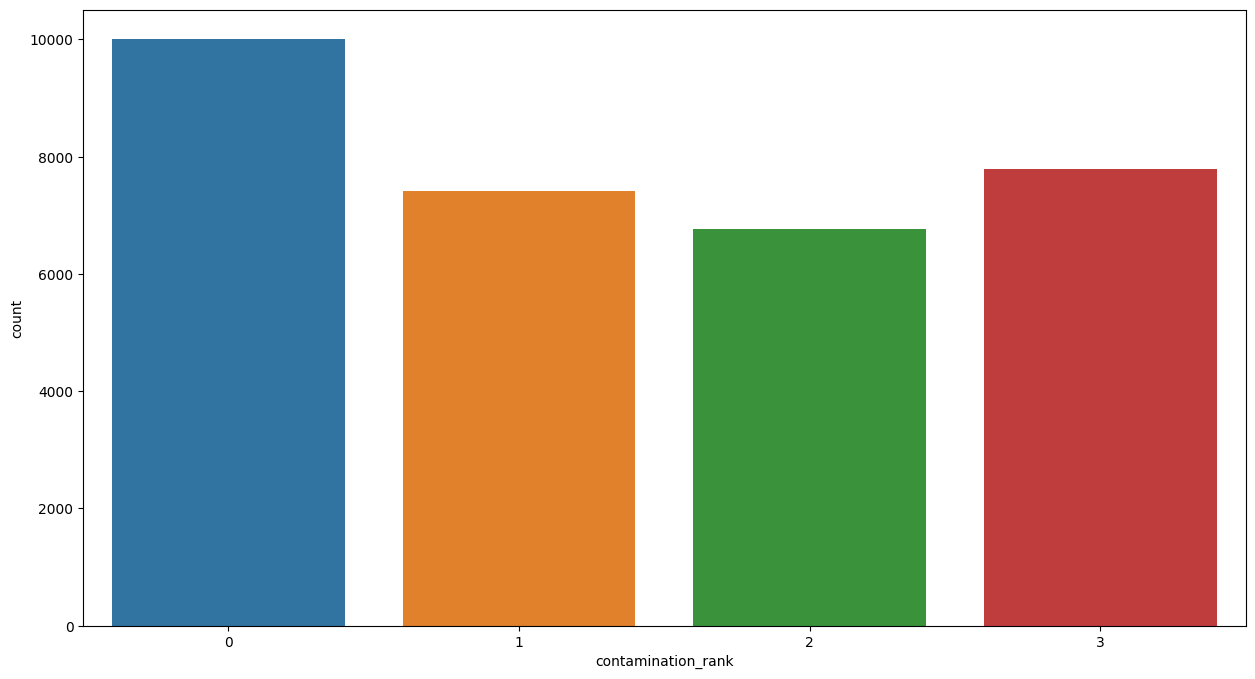

In [95]:
sns.countplot(data=df,x='contamination_rank')

In [96]:
df

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,level_pm2.5,level_pm10,level_no2,level_pm2.5coverage,level_pm10coverage,level_no2temporal,contamination_rank
0,Afghanistan,Kabul,2019,119.770,38.672193,22.300742,18.000000,93.138026,94.187606,2022,4,3,3.0,1.0,2,2,1
1,Albania,Durres,2015,19.372,17.650000,26.630000,93.525540,93.618826,83.961187,2022,3,1,3.0,3.0,2,1,0
2,Albania,Durres,2016,14.320,24.560000,24.780000,92.243725,92.772644,87.932605,2022,2,3,3.0,2.0,2,1,0
3,Albania,Elbasan,2015,19.372,25.575000,23.960000,93.525540,93.618826,97.853881,2022,3,3,3.0,3.0,2,3,2
4,Albania,Elbasan,2016,19.372,25.575000,26.260000,92.243725,92.772644,96.049636,2022,3,3,3.0,2.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,Viet Nam,Nha Trang,2013,44.990,30.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,1
32187,Viet Nam,Nha Trang,2014,44.990,12.000000,21.521620,79.791404,93.013115,93.079554,2018,4,1,3.0,1.0,2,2,0
32188,Viet Nam,Nha Trang,2015,44.990,14.000000,22.458023,79.791404,93.618826,94.532287,2018,4,1,3.0,1.0,2,2,0
32189,Viet Nam,Viet Tri,2013,44.990,27.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,1


In [97]:
df.dtypes

Country Name                   object
City                           object
Year                            int64
PM2.5 (μg/m3)                 float64
PM10 (μg/m3)                  float64
NO2 (μg/m3)                   float64
PM25 temporal coverage (%)    float64
PM10 temporal coverage (%)    float64
NO2 temporal coverage (%)     float64
Updated Year                    int64
level_pm2.5                     int64
level_pm10                      int64
level_no2                     float64
level_pm2.5coverage           float64
level_pm10coverage              int64
level_no2temporal               int64
contamination_rank              int64
dtype: object

In [98]:
df

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,level_pm2.5,level_pm10,level_no2,level_pm2.5coverage,level_pm10coverage,level_no2temporal,contamination_rank
0,Afghanistan,Kabul,2019,119.770,38.672193,22.300742,18.000000,93.138026,94.187606,2022,4,3,3.0,1.0,2,2,1
1,Albania,Durres,2015,19.372,17.650000,26.630000,93.525540,93.618826,83.961187,2022,3,1,3.0,3.0,2,1,0
2,Albania,Durres,2016,14.320,24.560000,24.780000,92.243725,92.772644,87.932605,2022,2,3,3.0,2.0,2,1,0
3,Albania,Elbasan,2015,19.372,25.575000,23.960000,93.525540,93.618826,97.853881,2022,3,3,3.0,3.0,2,3,2
4,Albania,Elbasan,2016,19.372,25.575000,26.260000,92.243725,92.772644,96.049636,2022,3,3,3.0,2.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,Viet Nam,Nha Trang,2013,44.990,30.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,1
32187,Viet Nam,Nha Trang,2014,44.990,12.000000,21.521620,79.791404,93.013115,93.079554,2018,4,1,3.0,1.0,2,2,0
32188,Viet Nam,Nha Trang,2015,44.990,14.000000,22.458023,79.791404,93.618826,94.532287,2018,4,1,3.0,1.0,2,2,0
32189,Viet Nam,Viet Tri,2013,44.990,27.000000,20.843575,79.791404,93.059218,93.167564,2018,4,3,3.0,1.0,2,2,1


In [99]:
#Using StandarScaler to normalize the Columns
Sc=StandardScaler()

column=['PM2.5 (μg/m3)','PM10 (μg/m3)','NO2 (μg/m3)','PM25 temporal coverage (%)',
                    'PM10 temporal coverage (%)','NO2 temporal coverage (%)']

for i in column:
    df[i] = Sc.fit_transform(df[[i]])


In [100]:
df

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,level_pm2.5,level_pm10,level_no2,level_pm2.5coverage,level_pm10coverage,level_no2temporal,contamination_rank
0,Afghanistan,Kabul,2019,6.853344,0.062343,-0.006046,-7.566556,0.046544,0.073366,2022,4,3,3.0,1.0,2,2,1
1,Albania,Durres,2015,-0.034541,-0.607766,0.350242,0.284100,0.119252,-1.034338,2022,3,1,3.0,3.0,2,1,0
2,Albania,Durres,2016,-0.381138,-0.387501,0.197991,0.150860,-0.008710,-0.604162,2022,2,3,3.0,2.0,2,1,0
3,Albania,Elbasan,2015,-0.034541,-0.355147,0.130507,0.284100,0.119252,0.470490,2022,3,3,3.0,3.0,2,3,2
4,Albania,Elbasan,2016,-0.034541,-0.355147,0.319792,0.150860,-0.008710,0.275058,2022,3,3,3.0,2.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,Viet Nam,Nha Trang,2013,1.723002,-0.214094,-0.125968,-1.143522,0.034626,-0.037122,2018,4,3,3.0,1.0,2,2,1
32187,Viet Nam,Nha Trang,2014,1.723002,-0.787867,-0.070166,-1.143522,0.027655,-0.046655,2018,4,1,3.0,1.0,2,2,0
32188,Viet Nam,Nha Trang,2015,1.723002,-0.724114,0.006897,-1.143522,0.119252,0.110702,2018,4,1,3.0,1.0,2,2,0
32189,Viet Nam,Viet Tri,2013,1.723002,-0.309723,-0.125968,-1.143522,0.034626,-0.037122,2018,4,3,3.0,1.0,2,2,1


In [101]:
df['Country Name'].nunique()

117

In [102]:
df['City'].nunique()

6851

<AxesSubplot: >

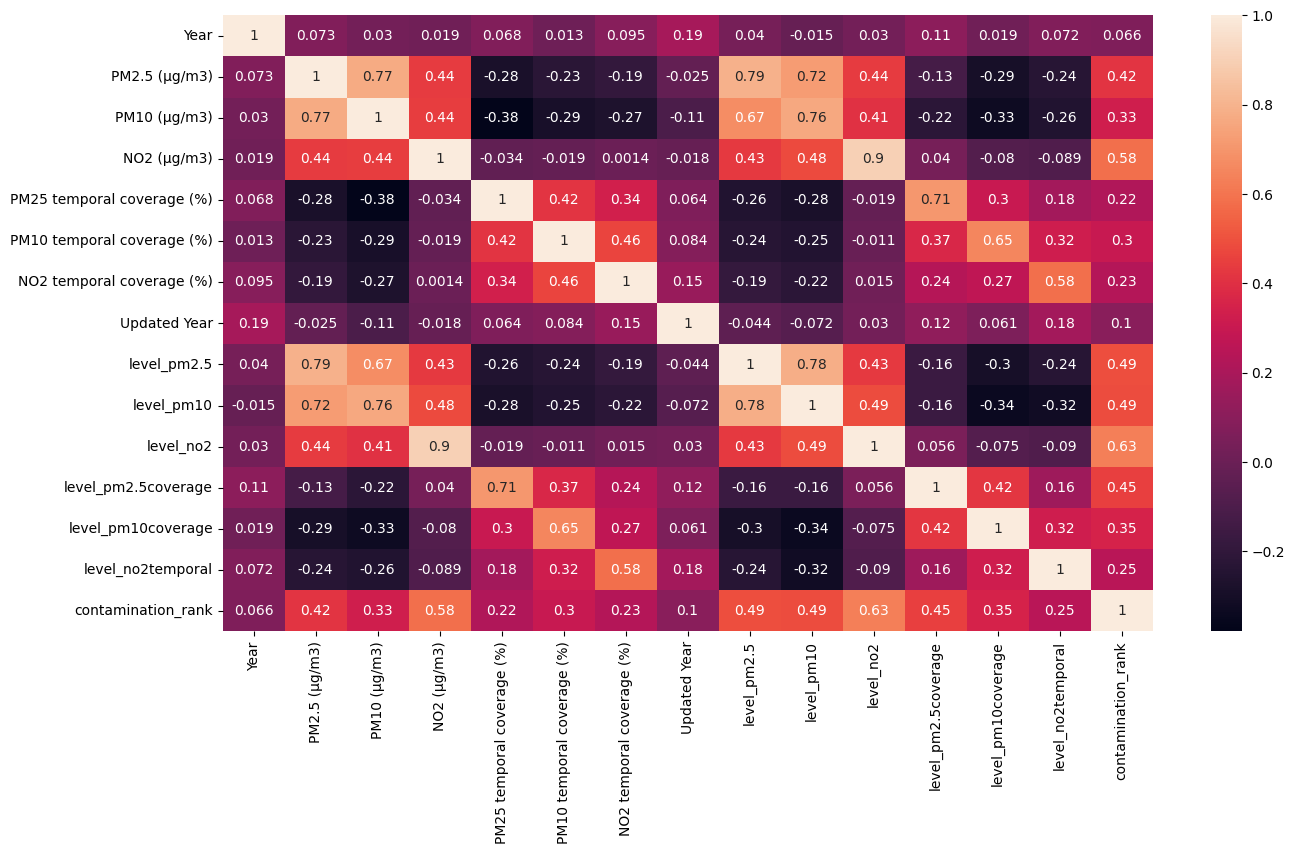

In [103]:
plt.rcParams['figure.figsize']= 15,8
sns.heatmap(df.corr(),annot=True)

In [127]:
Ohe = OneHotEncoder(sparse=False)

transformed = Ohe.fit_transform(df[['Year','Country Name']])

transformed




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [105]:
Ohe.categories_

[array([2000, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       dtype=int64),
 array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
        'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Belgium', 'Bhutan', 'Bolivia (Plurinational State of)',
        'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon',
        'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
        'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt',
        'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
        'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras',
        'Hungary', 'Iceland', 'India', 'Indonesia',
        'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
        'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
        'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia',
        '

In [128]:
encoded_cols = Ohe.get_feature_names(['Year','Country Name'])

encoded_cols

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020',
       'Year_2021', 'Country Name_Afghanistan', 'Country Name_Albania',
       'Country Name_Algeria', 'Country Name_Andorra',
       'Country Name_Argentina', 'Country Name_Australia',
       'Country Name_Austria', 'Country Name_Bahamas',
       'Country Name_Bahrain', 'Country Name_Bangladesh',
       'Country Name_Belgium', 'Country Name_Bhutan',
       'Country Name_Bolivia (Plurinational State of)',
       'Country Name_Bosnia and Herzegovina', 'Country Name_Brazil',
       'Country Name_Bulgaria', 'Country Name_Cameroon',
       'Country Name_Canada', 'Country Name_Chile', 'Country Name_China',
       'Country Name_Colombia', 'Country Name_Costa Rica',
       'Country Name_Croatia', 'Country Name

In [122]:
df

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,level_pm2.5,level_pm10,level_no2,level_pm2.5coverage,level_pm10coverage,level_no2temporal,contamination_rank
0,Afghanistan,Kabul,2019,6.853344,0.062343,-0.006046,-7.566556,0.046544,0.073366,2022,4,3,3.0,1.0,2,2,1
1,Albania,Durres,2015,-0.034541,-0.607766,0.350242,0.284100,0.119252,-1.034338,2022,3,1,3.0,3.0,2,1,0
2,Albania,Durres,2016,-0.381138,-0.387501,0.197991,0.150860,-0.008710,-0.604162,2022,2,3,3.0,2.0,2,1,0
3,Albania,Elbasan,2015,-0.034541,-0.355147,0.130507,0.284100,0.119252,0.470490,2022,3,3,3.0,3.0,2,3,2
4,Albania,Elbasan,2016,-0.034541,-0.355147,0.319792,0.150860,-0.008710,0.275058,2022,3,3,3.0,2.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,Viet Nam,Nha Trang,2013,1.723002,-0.214094,-0.125968,-1.143522,0.034626,-0.037122,2018,4,3,3.0,1.0,2,2,1
32187,Viet Nam,Nha Trang,2014,1.723002,-0.787867,-0.070166,-1.143522,0.027655,-0.046655,2018,4,1,3.0,1.0,2,2,0
32188,Viet Nam,Nha Trang,2015,1.723002,-0.724114,0.006897,-1.143522,0.119252,0.110702,2018,4,1,3.0,1.0,2,2,0
32189,Viet Nam,Viet Tri,2013,1.723002,-0.309723,-0.125968,-1.143522,0.034626,-0.037122,2018,4,3,3.0,1.0,2,2,1


In [129]:
df_encoded = pd.DataFrame(transformed, columns= encoded_cols)

df_encoded

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Country Name_Uganda,Country Name_Ukraine,Country Name_United Arab Emirates,Country Name_United Kingdom,Country Name_United Republic of Tanzania,Country Name_United States of America,Country Name_Uruguay,Country Name_Uzbekistan,Country Name_Venezuela (Bolivarian Republic of),Country Name_Viet Nam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [131]:
df.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)


df_def = pd.concat([df,df_encoded],axis=1)
df_def

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,...,Country Name_Uganda,Country Name_Ukraine,Country Name_United Arab Emirates,Country Name_United Kingdom,Country Name_United Republic of Tanzania,Country Name_United States of America,Country Name_Uruguay,Country Name_Uzbekistan,Country Name_Venezuela (Bolivarian Republic of),Country Name_Viet Nam
0,Afghanistan,Kabul,2019,6.853344,0.062343,-0.006046,-7.566556,0.046544,0.073366,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,Durres,2015,-0.034541,-0.607766,0.350242,0.284100,0.119252,-1.034338,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,Durres,2016,-0.381138,-0.387501,0.197991,0.150860,-0.008710,-0.604162,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,Elbasan,2015,-0.034541,-0.355147,0.130507,0.284100,0.119252,0.470490,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,Elbasan,2016,-0.034541,-0.355147,0.319792,0.150860,-0.008710,0.275058,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31986,Viet Nam,Nha Trang,2013,1.723002,-0.214094,-0.125968,-1.143522,0.034626,-0.037122,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31987,Viet Nam,Nha Trang,2014,1.723002,-0.787867,-0.070166,-1.143522,0.027655,-0.046655,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31988,Viet Nam,Nha Trang,2015,1.723002,-0.724114,0.006897,-1.143522,0.119252,0.110702,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31989,Viet Nam,Viet Tri,2013,1.723002,-0.309723,-0.125968,-1.143522,0.034626,-0.037122,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
df_def.isnull().sum()

Country Name                                       200
City                                               200
Year                                               200
PM2.5 (μg/m3)                                      200
PM10 (μg/m3)                                       200
                                                  ... 
Country Name_United States of America              200
Country Name_Uruguay                               200
Country Name_Uzbekistan                            200
Country Name_Venezuela (Bolivarian Republic of)    200
Country Name_Viet Nam                              200
Length: 155, dtype: int64

In [121]:
df_def['Country Name_United States of America'].value_counts()

0.0    30215
1.0     1776
Name: Country Name_United States of America, dtype: int64

In [109]:
#drop the rows where colA and colB have null values
#df = df.dropna(subset=['colA', 'colB'], how='all')

In [110]:
#df.groupby('City')['PM10 (μg/m3)'].mean()

In [111]:
#df.groupby('City')['NO2 (μg/m3)'].mean()

In [112]:
#df.groupby('City')['PM25 temporal coverage (%)'].mean()

In [113]:
#df.groupby('City')['PM10 temporal coverage (%)'].mean()

In [114]:
#df.groupby('City')['NO2 temporal coverage (%)'].mean()

In [115]:
df[['PM2.5 (μg/m3)', 'PM10 (μg/m3)',
       'NO2 (μg/m3)', 'PM25 temporal coverage (%)',
       'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']].index[df[['PM2.5 (μg/m3)', 'PM10 (μg/m3)',
       'NO2 (μg/m3)', 'PM25 temporal coverage (%)',
       'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']].isnull().all(1)]

Int64Index([], dtype='int64')

In [116]:
df[df.isna().any(axis=1)]

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,level_pm2.5,level_pm10,level_no2,level_pm2.5coverage,level_pm10coverage,level_no2temporal,contamination_rank
2601,Canada,Aylesford,2016,-0.951938,-0.735233,-1.841349,0.645260,-0.057932,0.594635,2022,1,1,NaN,4.0,2,4,0
3357,Canada,Southampton,2017,-0.951938,-0.735233,-1.841349,-0.706051,-0.057932,0.269681,2022,1,1,NaN,1.0,2,3,0
3359,Canada,Southampton,2019,-1.089150,-0.735233,-1.841349,0.333419,-0.057932,-0.271908,2022,1,1,NaN,3.0,2,1,0
16879,Israel,Holon (Tel Aviv),2012,-0.197274,0.476649,-0.018616,-9.437602,-0.528096,-0.664605,2022,3,4,3.0,NaN,1,1,0


In [117]:
#Look at rows with all null values

df[['PM2.5 (μg/m3)', 'PM10 (μg/m3)',
       'NO2 (μg/m3)', 'PM25 temporal coverage (%)',
       'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']][df[['PM2.5 (μg/m3)', 'PM10 (μg/m3)',
       'NO2 (μg/m3)', 'PM25 temporal coverage (%)',
       'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']].isnull().all(axis=1)]

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)


In [118]:
df.iloc[21855]

Country Name                       Poland
City                          Busko-Zdroj
Year                                 2016
PM2.5 (μg/m3)                    0.020206
PM10 (μg/m3)                    -0.317373
NO2 (μg/m3)                      -0.49473
PM25 temporal coverage (%)       0.148049
PM10 temporal coverage (%)      -0.379213
NO2 temporal coverage (%)        0.270807
Updated Year                         2022
level_pm2.5                             3
level_pm10                              3
level_no2                             2.0
level_pm2.5coverage                   2.0
level_pm10coverage                      1
level_no2temporal                       3
contamination_rank                      1
Name: 21964, dtype: object